In [1]:
from __future__ import print_function

from sklearn import __version__ as sklearn_version
print('Sklearn version:', sklearn_version)

Sklearn version: 0.18.1


# Load data

Predict the california average house value

In [2]:
from sklearn import datasets

all_data = datasets.california_housing.fetch_california_housing()

# Describe dataset
print(all_data.DESCR)
print(all_data.feature_names)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
# Print some data lines
print(all_data.data[:10])
print(all_data.target)

[[  8.32520000e+00   4.10000000e+01   6.98412698e+00   1.02380952e+00
    3.22000000e+02   2.55555556e+00   3.78800000e+01  -1.22230000e+02]
 [  8.30140000e+00   2.10000000e+01   6.23813708e+00   9.71880492e-01
    2.40100000e+03   2.10984183e+00   3.78600000e+01  -1.22220000e+02]
 [  7.25740000e+00   5.20000000e+01   8.28813559e+00   1.07344633e+00
    4.96000000e+02   2.80225989e+00   3.78500000e+01  -1.22240000e+02]
 [  5.64310000e+00   5.20000000e+01   5.81735160e+00   1.07305936e+00
    5.58000000e+02   2.54794521e+00   3.78500000e+01  -1.22250000e+02]
 [  3.84620000e+00   5.20000000e+01   6.28185328e+00   1.08108108e+00
    5.65000000e+02   2.18146718e+00   3.78500000e+01  -1.22250000e+02]
 [  4.03680000e+00   5.20000000e+01   4.76165803e+00   1.10362694e+00
    4.13000000e+02   2.13989637e+00   3.78500000e+01  -1.22250000e+02]
 [  3.65910000e+00   5.20000000e+01   4.93190661e+00   9.51361868e-01
    1.09400000e+03   2.12840467e+00   3.78400000e+01  -1.22250000e+02]
 [  3.1200000

In [4]:
#Randomize, normalize and separate train & test

from sklearn.utils import shuffle
X, y = shuffle(all_data.data, all_data.target, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize the data
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X_train = normal.fit_transform(X_train)
X_test = normal.transform(X_test)

## Model with the recommendation of the cheat-sheet
   - Based on the [Sklearn algorithm cheat-sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

In [5]:
from sklearn import linear_model

reg = linear_model.Ridge()
reg.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import mean_absolute_error

y_test_predict = reg.predict(X_test)
print('Mean absolute error ', mean_absolute_error(y_test, y_test_predict))
print('Variance score: ', reg.score(X_test, y_test))

Mean absolute error  0.886655025074
Variance score:  0.0685566069894


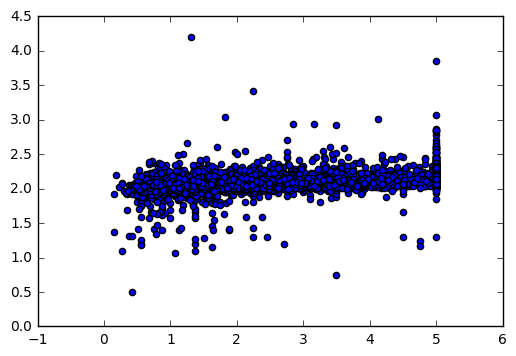

In [6]:
# Plot a scaterplot real vs predict
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_test_predict)


In [7]:
# Save model
from sklearn.externals import joblib

joblib.dump(reg, '/tmp/reg_model.pkl') 

['/tmp/reg_model.pkl']

In [8]:
# Load model
reg_loaded = joblib.load('/tmp/reg_model.pkl') 

In [9]:
# View the coeficients
print('Coeficients :', reg_loaded.coef_)
print('Intercept: ', reg_loaded.intercept_ )

Coeficients : [ 21.64332905   4.39536291   3.13367919  -1.16447227   0.83220545
  -3.2404152   -6.26577343  -0.54926884]
Intercept:  1.17978496107


## Improve the model parametrization

In [10]:
# Use the function RidgeCV to select the best alpha using cross validation
reg = linear_model.RidgeCV(alphas=[.1, 1., 10.])
reg.fit(X_train, y_train)

print('Best alpha: ', reg.alpha_)

Best alpha:  0.1


Mean absolute error  0.810041467227
Variance score:  0.209383591131


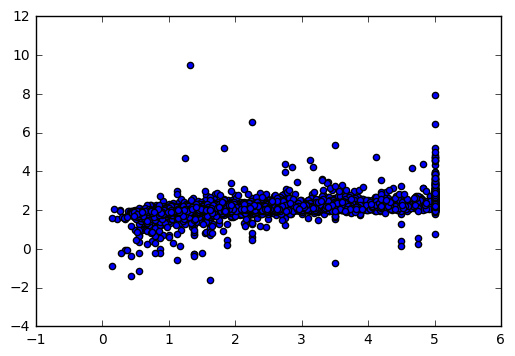

In [11]:
# Build a model with the recommended alpha
reg = linear_model.Ridge (alpha = 0.1)
reg.fit(X_train, y_train)

y_test_predict = reg.predict(X_test)
print('Mean absolute error ', mean_absolute_error(y_test, y_test_predict))
print('Variance score: ', reg.score(X_test, y_test))

plt.scatter(y_test, y_test_predict)

## Check the second cheat sheet recommendation, a LinearSVR model

Mean absolute error  0.867453648
Variance score:  -0.00607433544938


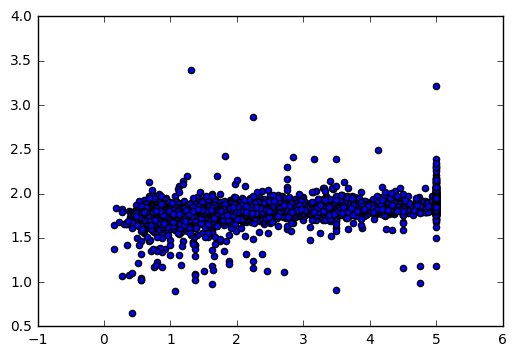

In [12]:
from sklearn import svm

reg_svr = svm.LinearSVR()
reg_svr.fit(X_train, y_train)

y_test_predict = reg_svr.predict(X_test)
print('Mean absolute error ', mean_absolute_error(y_test, y_test_predict))
print('Variance score: ', reg_svr.score(X_test, y_test))

plt.scatter(y_test, y_test_predict)

# Build a decision tree regressor

Mean absolute error  0.657522387279
Variance score:  0.356019005722


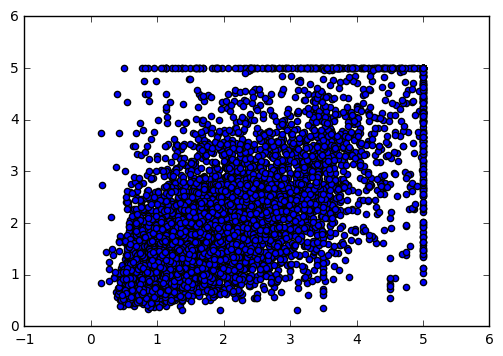

In [13]:
# Basic regression tree
from sklearn import tree

dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)

y_test_predict = dtree.predict(X_test)
print('Mean absolute error ', mean_absolute_error(y_test, y_test_predict))
print('Variance score: ', dtree.score(X_test, y_test))

plt.scatter(y_test, y_test_predict)

Mean absolute error  0.626954839938
Variance score:  0.488285126735


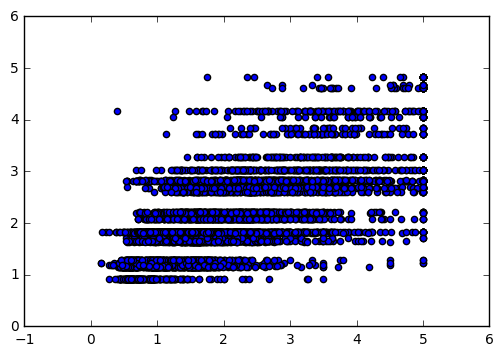

In [14]:
# A second model regularized controling the depth

dtree2 = tree.DecisionTreeRegressor(max_depth=5)
dtree2.fit(X_train, y_train)

y_test_predict = dtree2.predict(X_test)
print('Mean absolute error ', mean_absolute_error(y_test, y_test_predict))
print('Variance score: ', dtree2.score(X_test, y_test))

plt.scatter(y_test, y_test_predict)

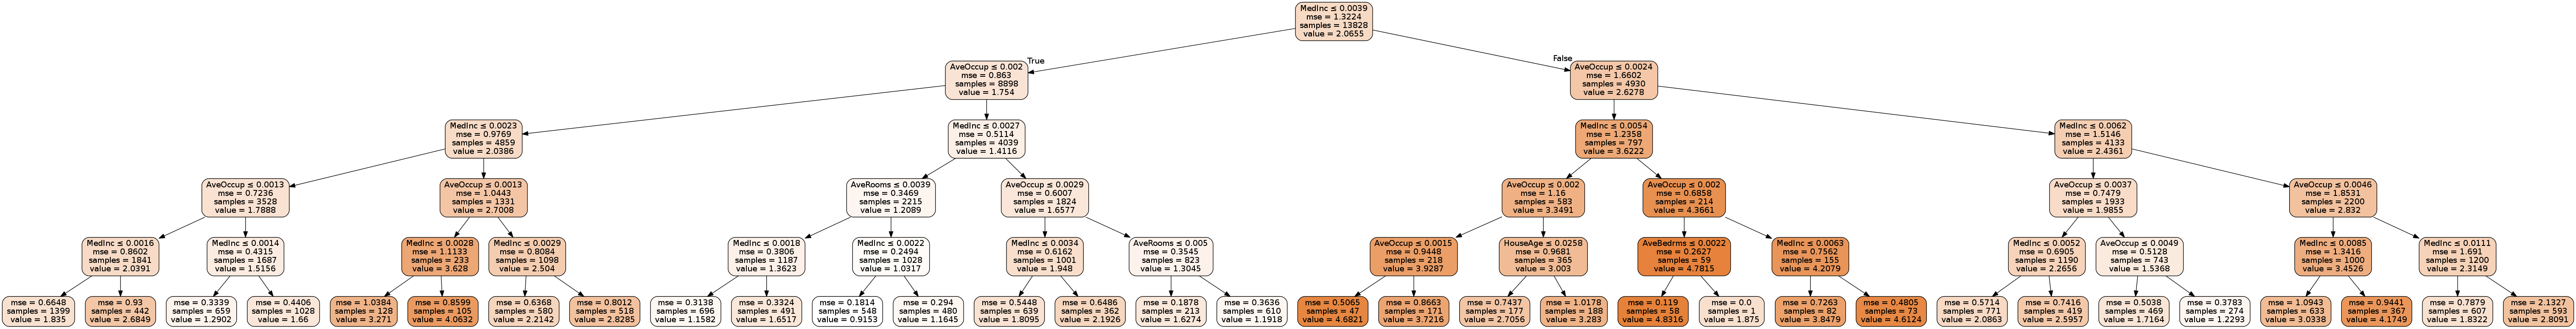

In [15]:
# Plot the tree
import pydotplus 

from IPython.display import Image  
dot_data = tree.export_graphviz(dtree2, out_file=None, 
                         feature_names=all_data.feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 